In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
df=pd.read_csv("/content/drive/MyDrive/mansoon.csv")
df


,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4183,Lakshadweep,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4184,Lakshadweep,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5
4185,Lakshadweep,2015,2.2,0.5,3.7,87.1,133.1,296.6,257.5,146.4,160.4,165.4,231.0,159.0,1642.9,2.7,223.9,860.9,555.4
4186,Lakshadweep,2016,59.6,12.1,3.2,2.6,77.4,321.1,262.6,86.2,75.6,58.6,32.0,74.7,1065.7,71.7,83.2,745.4,165.4


In [ ]:
df1=df[df["SUBDIVISION"] == "Coastal Andhra Pradesh"]
df1

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
3136,Coastal Andhra Pradesh,1901,18.8,80.9,7.2,28.7,68.7,77.7,113.0,133.7,125.3,173.4,164.8,1.5,993.8,99.7,104.6,449.7,339.8
3137,Coastal Andhra Pradesh,1902,2.0,0.0,2.8,23.9,37.6,72.6,144.5,236.1,204.5,262.0,50.4,27.1,1063.6,2.0,64.4,657.7,339.5
3138,Coastal Andhra Pradesh,1903,0.8,13.3,0.2,6.2,73.4,154.0,248.6,258.0,216.5,159.1,173.9,12.1,1316.2,14.2,79.8,877.1,345.1
3139,Coastal Andhra Pradesh,1904,1.3,0.0,5.4,3.0,136.3,107.8,120.2,117.7,116.8,240.9,0.0,10.7,860.2,1.3,144.7,462.6,251.6
3140,Coastal Andhra Pradesh,1905,1.1,16.7,68.0,37.0,68.8,84.4,64.6,210.8,170.2,66.0,7.4,0.0,795.2,17.8,173.8,530.1,73.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248,Coastal Andhra Pradesh,2013,2.0,29.6,0.2,48.0,28.2,127.5,162.4,123.1,132.0,411.5,53.1,2.8,1120.5,31.7,76.4,545.0,467.4
3249,Coastal Andhra Pradesh,2014,0.4,1.2,9.1,6.0,112.9,45.7,151.8,177.8,144.5,195.6,23.7,6.4,874.9,1.5,128.0,519.7,225.7
3250,Coastal Andhra Pradesh,2015,2.0,0.6,5.5,32.3,34.1,283.8,116.0,192.0,201.8,59.7,81.2,2.0,1010.9,2.5,71.9,793.6,142.8
3251,Coastal Andhra Pradesh,2016,1.6,0.9,3.6,3.0,120.8,189.1,131.5,124.4,224.4,59.7,13.1,36.9,908.9,2.5,127.4,669.4,109.7


In [ ]:
df2=df1.drop(["SUBDIVISION",'JAN','FEB','MAR','APR','MAY','OCT','NOV','DEC','ANNUAL','JF','MAM','OND'],axis=1)
df2

,YEAR,JUN,JUL,AUG,SEP,JJAS
3136,1901,77.7,113.0,133.7,125.3,449.7
3137,1902,72.6,144.5,236.1,204.5,657.7
3138,1903,154.0,248.6,258.0,216.5,877.1
3139,1904,107.8,120.2,117.7,116.8,462.6
3140,1905,84.4,64.6,210.8,170.2,530.1
...,...,...,...,...,...,...
3248,2013,127.5,162.4,123.1,132.0,545.0
3249,2014,45.7,151.8,177.8,144.5,519.7
3250,2015,283.8,116.0,192.0,201.8,793.6
3251,2016,189.1,131.5,124.4,224.4,669.4


In [ ]:
df2.rename(columns={"JJAS": "mansoon"},inplace=True)
df2

,YEAR,JUN,JUL,AUG,SEP,mansoon
3136,1901,77.7,113.0,133.7,125.3,449.7
3137,1902,72.6,144.5,236.1,204.5,657.7
3138,1903,154.0,248.6,258.0,216.5,877.1
3139,1904,107.8,120.2,117.7,116.8,462.6
3140,1905,84.4,64.6,210.8,170.2,530.1
...,...,...,...,...,...,...
3248,2013,127.5,162.4,123.1,132.0,545.0
3249,2014,45.7,151.8,177.8,144.5,519.7
3250,2015,283.8,116.0,192.0,201.8,793.6
3251,2016,189.1,131.5,124.4,224.4,669.4


In [ ]:
df3=df2.reset_index()
df3

,index,YEAR,JUN,JUL,AUG,SEP,mansoon
0,3136,1901,77.7,113.0,133.7,125.3,449.7
1,3137,1902,72.6,144.5,236.1,204.5,657.7
2,3138,1903,154.0,248.6,258.0,216.5,877.1
3,3139,1904,107.8,120.2,117.7,116.8,462.6
4,3140,1905,84.4,64.6,210.8,170.2,530.1
...,...,...,...,...,...,...,...
112,3248,2013,127.5,162.4,123.1,132.0,545.0
113,3249,2014,45.7,151.8,177.8,144.5,519.7
114,3250,2015,283.8,116.0,192.0,201.8,793.6
115,3251,2016,189.1,131.5,124.4,224.4,669.4


In [ ]:
df4=df3.drop(['index'],axis=1)
df4

,YEAR,JUN,JUL,AUG,SEP,mansoon
0,1901,77.7,113.0,133.7,125.3,449.7
1,1902,72.6,144.5,236.1,204.5,657.7
2,1903,154.0,248.6,258.0,216.5,877.1
3,1904,107.8,120.2,117.7,116.8,462.6
4,1905,84.4,64.6,210.8,170.2,530.1
...,...,...,...,...,...,...
112,2013,127.5,162.4,123.1,132.0,545.0
113,2014,45.7,151.8,177.8,144.5,519.7
114,2015,283.8,116.0,192.0,201.8,793.6
115,2016,189.1,131.5,124.4,224.4,669.4


In [ ]:
df4.to_csv("mansoon lca.csv")

In [ ]:
# split into input (X) and output (y) variables
X = df4.iloc[:,0:5]
y = df4.iloc[:,5]
# X = df4.drop(['JJAS'],axis='columns')
# Y = df4[['JJAS']]

In [ ]:
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
# X_train,X_validation,y_train,y_validation=train_test_split(X_train,y_train,test_size=0.2)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size = 0.3,random_state = 0)


In [ ]:
y_test

10     545.1
59     743.9
95     829.4
91     637.1
7      661.1
86     442.2
26     723.1
112    545.0
22     487.1
94     646.6
101    435.0
2      877.1
50     779.4
24     676.5
116    668.8
62     571.4
93     574.4
74     796.5
61     819.6
73     573.8
16     779.2
108    528.8
13     800.0
43     629.1
105    762.6
33     641.7
30     672.2
56     799.0
48     762.4
8      626.8
97     858.0
66     635.9
109    954.0
3      462.6
63     867.0
6      557.2
Name: mansoon, dtype: float64

In [ ]:

model = Sequential()
model.add(Dense(150, input_dim = 5, activation = "relu"))
model.add(Dense(120, activation = "relu"))
model.add(Dense(80,activation = "relu"))
model.add(Dense(1, activation = "linear"))

In [ ]:


keras.optimizers.Adam(lr = 0.0001 , beta_1 = 0.9 ,beta_2 = 0.999 ,amsgrad=False)
model.compile(loss='mean_squared_error', optimizer = 'adam' , metrics = ['acc'])

In [ ]:

history=model.fit(X_train,y_train,epochs = 300 ,batch_size = 290 , validation_split = 0.2 ,validation_data = (X_test,y_test) ,verbose = 1)

Epoch 1/300
1/1 [==============================] - 1s 1s/step - loss: 363001.4375 - acc: 0.0000e+00 - val_loss: 256090.6719 - val_acc: 0.0000e+00
Epoch 2/300
1/1 [==============================] - 0s 48ms/step - loss: 244755.3438 - acc: 0.0000e+00 - val_loss: 165394.6875 - val_acc: 0.0000e+00
Epoch 3/300
1/1 [==============================] - 0s 46ms/step - loss: 154698.4375 - acc: 0.0000e+00 - val_loss: 103535.3359 - val_acc: 0.0000e+00
Epoch 4/300
1/1 [==============================] - 0s 55ms/step - loss: 93597.5625 - acc: 0.0000e+00 - val_loss: 58089.5469 - val_acc: 0.0000e+00
Epoch 5/300
1/1 [==============================] - 0s 51ms/step - loss: 48842.5000 - acc: 0.0000e+00 - val_loss: 30474.8496 - val_acc: 0.0000e+00
Epoch 6/300
1/1 [==============================] - 0s 64ms/step - loss: 21970.6816 - acc: 0.0000e+00 - val_loss: 19732.9414 - val_acc: 0.0000e+00
Epoch 7/300
1/1 [==============================] - 0s 46ms/step - loss: 12037.4297 - acc: 0.0000e+00 - val_loss: 22335.6

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 150)               900       
_________________________________________________________________
dense_1 (Dense)              (None, 120)               18120     
_________________________________________________________________
dense_2 (Dense)              (None, 80)                9680      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 81        
Total params: 28,781
Trainable params: 28,781
Non-trainable params: 0
_________________________________________________________________


In [ ]:
score = model.evaluate(X_test,y_test)
print(score[0])

2/2 [==============================] - 0s 5ms/step - loss: 1.8399 - acc: 0.0000e+00
1.8398938179016113


In [ ]:
Accuracy = 100 - score[0]
Accuracy

98.16010618209839

In [ ]:
predictions=model.predict(X)
print(predictions)
df_new=pd.DataFrame(predictions,columns=['prediction'])
df_new.head()
df_new.to_csv("predict4.csv")

[[449.01767]
 [656.0397 ]
 [872.12756]
 [462.38626]
 [528.2421 ]
 [777.3518 ]
 [558.4304 ]
 [662.4931 ]
 [626.1509 ]
 [823.8397 ]
 [546.04333]
 [691.9866 ]
 [540.4185 ]
 [799.251  ]
 [708.7843 ]
 [805.2881 ]
 [778.9292 ]
 [496.74503]
 [587.08844]
 [394.70877]
 [698.72766]
 [499.0336 ]
 [490.91104]
 [726.4326 ]
 [677.3069 ]
 [599.6731 ]
 [723.62384]
 [622.42444]
 [553.0246 ]
 [572.15717]
 [672.2269 ]
 [553.5739 ]
 [621.8007 ]
 [641.9331 ]
 [567.61206]
 [688.0681 ]
 [494.16724]
 [789.6405 ]
 [490.3763 ]
 [586.3313 ]
 [557.2823 ]
 [552.8216 ]
 [583.36475]
 [629.35126]
 [626.95807]
 [578.67566]
 [729.41345]
 [633.50806]
 [762.75806]
 [645.01404]
 [781.27795]
 [476.06686]
 [660.1007 ]
 [820.0969 ]
 [686.9752 ]
 [887.81696]
 [797.8612 ]
 [852.02655]
 [844.8879 ]
 [744.4526 ]
 [692.94006]
 [819.81903]
 [571.15   ]
 [863.0801 ]
 [584.1488 ]
 [644.339  ]
 [637.7652 ]
 [453.7927 ]
 [541.23315]
 [733.65393]
 [612.2451 ]
 [518.54785]
 [542.2096 ]
 [573.18463]
 [796.3624 ]
 [598.47217]
 [551.15247]

In [ ]:

df28=pd.read_csv("/content/drive/MyDrive/predict4.csv")
df28




,Unnamed: 0,prediction
0,0,450.55832
1,1,657.11760
2,2,870.37030
3,3,461.80588
4,4,531.25990
...,...,...
112,112,544.93994
113,113,521.37195
114,114,793.69070
115,115,669.59500


In [ ]:
df31=df28.drop('Unnamed: 0',axis=1)
df31

,prediction
0,450.55832
1,657.11760
2,870.37030
3,461.80588
4,531.25990
...,...
112,544.93994
113,521.37195
114,793.69070
115,669.59500


In [ ]:
df33=pd.concat([df31,df3.YEAR],axis=1)
df33

,prediction,YEAR
0,450.55832,1901
1,657.11760,1902
2,870.37030,1903
3,461.80588,1904
4,531.25990,1905
...,...,...
112,544.93994,2013
113,521.37195,2014
114,793.69070,2015
115,669.59500,2016


In [ ]:
import keras.backend as kb
import tensorflow as tf
tf.keras.backend.clear_session()

In [ ]:
# for2018
print(model.predict([[2018,190,158,250,141]]))

[[739.07556]]


In [ ]:
# for 2019
print(model.predict([[2019,128,160,124,135]]))

[[547.39056]]


In [ ]:
# for 2020
print(model.predict([[2020,135,170,138,170]]))

[[613.23047]]


In [ ]:
# for 2021
print(model.predict([[2021,140,185,145,175]]))

[[645.4371]]


In [ ]:
# df32=[[738.7046,546.90967,613.0584,645.1151]]

In [ ]:
df34 = pd.DataFrame(df33) 
   
  
df34.loc[len(df34.index)] = [738.7046,2018] 
  
df34.loc[len(df34.index)] = [546.90967,2019] 
df34.loc[len(df34.index)] = [613.0584,2020] 
df34.loc[len(df34.index)] = [645.1151,2021]

df34

,prediction,YEAR
0,450.55832,1901.0
1,657.11760,1902.0
2,870.37030,1903.0
3,461.80588,1904.0
4,531.25990,1905.0
...,...,...
116,668.27637,2017.0
117,738.70460,2018.0
118,546.90967,2019.0
119,613.05840,2020.0


In [ ]:
df35=pd.concat([df34,df3],axis=1)
df35

,prediction,YEAR,index,YEAR,JUN,JUL,AUG,SEP,mansoon
0,450.55832,1901.0,3136.0,1901.0,77.7,113.0,133.7,125.3,449.7
1,657.11760,1902.0,3137.0,1902.0,72.6,144.5,236.1,204.5,657.7
2,870.37030,1903.0,3138.0,1903.0,154.0,248.6,258.0,216.5,877.1
3,461.80588,1904.0,3139.0,1904.0,107.8,120.2,117.7,116.8,462.6
4,531.25990,1905.0,3140.0,1905.0,84.4,64.6,210.8,170.2,530.1
...,...,...,...,...,...,...,...,...,...
116,668.27637,2017.0,3252.0,2017.0,149.6,153.2,224.2,141.8,668.8
117,738.70460,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,546.90967,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,613.05840,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

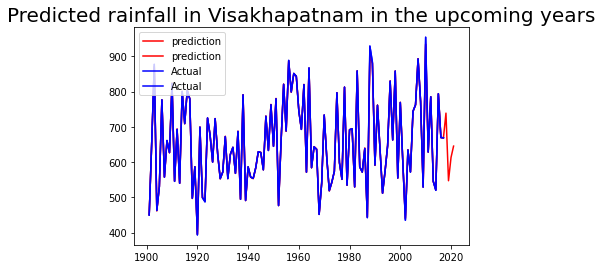

In [ ]:
import matplotlib.pyplot as plt
m=df35['prediction']
n=df35['mansoon']
x=df35['YEAR']
plt.plot(x,m,label="prediction",color='red',marker="")
plt.plot(x,n,label="Actual",color='blue',marker="")
# plt.xlim(1900,2021,1)
# plt.ylim(0,30000,5000)
# plt.axis([0,20,0,30000])
plt.title("Predicted rainfall in Visakhapatnam in the upcoming years",fontsize=20)
plt.legend()
# plt.savefig("predictected rainfall inthe upcoming years.jpg")
plt.show()

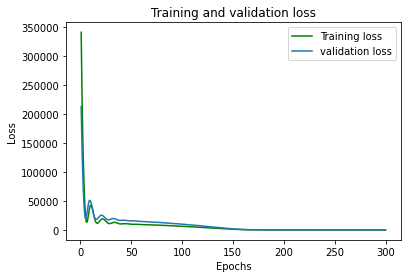

In [ ]:
import matplotlib.pyplot as plt
accuracy=history_dict['acc']
val_accuracy=history_dict['val_acc']
loss=history_dict['loss']
val_loss=history_dict['val_loss']
epochs=range(1,len(accuracy)+1)
plt.plot(epochs,loss,label='Training loss',color="g")
plt.plot(epochs,val_loss,label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
df5=df3.drop(['index'],axis=1)
df5

,YEAR,JUN,JUL,AUG,SEP,mansoon
0,1901,77.7,113.0,133.7,125.3,449.7
1,1902,72.6,144.5,236.1,204.5,657.7
2,1903,154.0,248.6,258.0,216.5,877.1
3,1904,107.8,120.2,117.7,116.8,462.6
4,1905,84.4,64.6,210.8,170.2,530.1
...,...,...,...,...,...,...
112,2013,127.5,162.4,123.1,132.0,545.0
113,2014,45.7,151.8,177.8,144.5,519.7
114,2015,283.8,116.0,192.0,201.8,793.6
115,2016,189.1,131.5,124.4,224.4,669.4


In [ ]:
df6=df5[df5["YEAR"]>=1997]
df6

,YEAR,JUN,JUL,AUG,SEP,mansoon
96,1997,63.1,156.0,128.1,315.5,662.7
97,1998,136.2,214.1,252.2,255.5,858.0
98,1999,126.4,154.2,136.6,137.5,554.7
99,2000,200.5,154.1,311.5,102.9,768.9
100,2001,117.2,123.0,170.7,187.2,598.1
101,2002,115.2,74.7,173.5,71.7,435.0
102,2003,104.0,241.7,158.3,130.2,634.1
103,2004,152.8,192.1,125.0,101.7,571.5
104,2005,88.1,151.5,105.9,398.1,743.6
105,2006,132.0,126.8,279.7,224.1,762.6


In [ ]:
df6.shape

(21, 6)

In [ ]:
df7=df6[df6["YEAR"]<=2014]
df7

,YEAR,JUN,JUL,AUG,SEP,mansoon
96,1997,63.1,156.0,128.1,315.5,662.7
97,1998,136.2,214.1,252.2,255.5,858.0
98,1999,126.4,154.2,136.6,137.5,554.7
99,2000,200.5,154.1,311.5,102.9,768.9
100,2001,117.2,123.0,170.7,187.2,598.1
101,2002,115.2,74.7,173.5,71.7,435.0
102,2003,104.0,241.7,158.3,130.2,634.1
103,2004,152.8,192.1,125.0,101.7,571.5
104,2005,88.1,151.5,105.9,398.1,743.6
105,2006,132.0,126.8,279.7,224.1,762.6


In [ ]:
df7.shape

(18, 6)

In [ ]:
import numpy as np

df8=df7.iloc[np.repeat(np.arange(len(df7)), 4)]
df8

,YEAR,JUN,JUL,AUG,SEP,mansoon
96,1997,63.1,156.0,128.1,315.5,662.7
96,1997,63.1,156.0,128.1,315.5,662.7
96,1997,63.1,156.0,128.1,315.5,662.7
96,1997,63.1,156.0,128.1,315.5,662.7
97,1998,136.2,214.1,252.2,255.5,858.0
...,...,...,...,...,...,...
112,2013,127.5,162.4,123.1,132.0,545.0
113,2014,45.7,151.8,177.8,144.5,519.7
113,2014,45.7,151.8,177.8,144.5,519.7
113,2014,45.7,151.8,177.8,144.5,519.7


In [ ]:
df9=df8.reset_index()
df9

,index,YEAR,JUN,JUL,AUG,SEP,mansoon
0,96,1997,63.1,156.0,128.1,315.5,662.7
1,96,1997,63.1,156.0,128.1,315.5,662.7
2,96,1997,63.1,156.0,128.1,315.5,662.7
3,96,1997,63.1,156.0,128.1,315.5,662.7
4,97,1998,136.2,214.1,252.2,255.5,858.0
...,...,...,...,...,...,...,...
67,112,2013,127.5,162.4,123.1,132.0,545.0
68,113,2014,45.7,151.8,177.8,144.5,519.7
69,113,2014,45.7,151.8,177.8,144.5,519.7
70,113,2014,45.7,151.8,177.8,144.5,519.7


In [ ]:
df10=df9.drop(['index'],axis=1)
df10

,YEAR,JUN,JUL,AUG,SEP,mansoon
0,1997,63.1,156.0,128.1,315.5,662.7
1,1997,63.1,156.0,128.1,315.5,662.7
2,1997,63.1,156.0,128.1,315.5,662.7
3,1997,63.1,156.0,128.1,315.5,662.7
4,1998,136.2,214.1,252.2,255.5,858.0
...,...,...,...,...,...,...
67,2013,127.5,162.4,123.1,132.0,545.0
68,2014,45.7,151.8,177.8,144.5,519.7
69,2014,45.7,151.8,177.8,144.5,519.7
70,2014,45.7,151.8,177.8,144.5,519.7


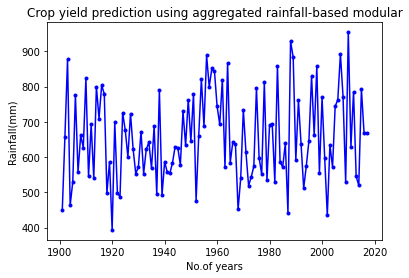

In [ ]:
import matplotlib.pyplot as plt

# B = data['Crop_Year']
A =df2['YEAR']
B =df2['mansoon']

# plot
plt.plot(A,B,c='blue', marker='.')

# #change axes ranges
# plt.xlim(0,120)
# plt.ylim(400,1000,100)


#add title
plt.title('Crop yield prediction using aggregated rainfall‑based modular')

#add x and y labels
plt.xlabel('No.of years')
plt.ylabel('Rainfall(mm)')

#show plot
plt.show()

In [ ]:
import pandas as pd
import numpy as nd
import matplotlib.pyplot as plt
data=pd.read_csv('/content/drive/MyDrive/cropdata.csv')
from sklearn import preprocessing
le_Crop=preprocessing.LabelEncoder()
data['Crop']=le_Crop.fit_transform(data['Crop'])
data['Crop'].unique()
data_n=data.drop(['District_Name','Season'],axis='columns')


print(data_n)

    Crop_Year  Crop   Area  Production
0        1997     0  17700        9700
1        1997     1   6400        6500
2        1997     2  35800       14600
3        1997     3  95600       79700
4        1998     0  25000       28700
..        ...   ...    ...         ...
67       2013     3  98637      171530
68       2014     0   2395        2170
69       2014     1   5894        9224
70       2014     2  20880       19982
71       2014     3  98190      159755

[72 rows x 4 columns]


In [ ]:
df11=pd.concat([data_n, df10], axis=1)
df11

,Crop_Year,Crop,Area,Production,YEAR,JUN,JUL,AUG,SEP,mansoon
0,1997,0,17700,9700,1997,63.1,156.0,128.1,315.5,662.7
1,1997,1,6400,6500,1997,63.1,156.0,128.1,315.5,662.7
2,1997,2,35800,14600,1997,63.1,156.0,128.1,315.5,662.7
3,1997,3,95600,79700,1997,63.1,156.0,128.1,315.5,662.7
4,1998,0,25000,28700,1998,136.2,214.1,252.2,255.5,858.0
...,...,...,...,...,...,...,...,...,...,...
67,2013,3,98637,171530,2013,127.5,162.4,123.1,132.0,545.0
68,2014,0,2395,2170,2014,45.7,151.8,177.8,144.5,519.7
69,2014,1,5894,9224,2014,45.7,151.8,177.8,144.5,519.7
70,2014,2,20880,19982,2014,45.7,151.8,177.8,144.5,519.7


In [ ]:
df11.rename(columns={"predictions": "rainfall"},inplace=True)
df11

,Crop_Year,Crop,Area,Production,YEAR,JUN,JUL,AUG,SEP,mansoon
0,1997,0,17700,9700,1997,63.1,156.0,128.1,315.5,662.7
1,1997,1,6400,6500,1997,63.1,156.0,128.1,315.5,662.7
2,1997,2,35800,14600,1997,63.1,156.0,128.1,315.5,662.7
3,1997,3,95600,79700,1997,63.1,156.0,128.1,315.5,662.7
4,1998,0,25000,28700,1998,136.2,214.1,252.2,255.5,858.0
...,...,...,...,...,...,...,...,...,...,...
67,2013,3,98637,171530,2013,127.5,162.4,123.1,132.0,545.0
68,2014,0,2395,2170,2014,45.7,151.8,177.8,144.5,519.7
69,2014,1,5894,9224,2014,45.7,151.8,177.8,144.5,519.7
70,2014,2,20880,19982,2014,45.7,151.8,177.8,144.5,519.7


In [ ]:
df12=df11.drop(['YEAR','JUN','JUL','AUG','SEP'],axis='columns')
df12

,Crop_Year,Crop,Area,Production,mansoon
0,1997,0,17700,9700,662.7
1,1997,1,6400,6500,662.7
2,1997,2,35800,14600,662.7
3,1997,3,95600,79700,662.7
4,1998,0,25000,28700,858.0
...,...,...,...,...,...
67,2013,3,98637,171530,545.0
68,2014,0,2395,2170,519.7
69,2014,1,5894,9224,519.7
70,2014,2,20880,19982,519.7


In [ ]:
df13=df11.drop(['YEAR'],axis='columns')
df13

,Crop_Year,Crop,Area,Production,JUN,JUL,AUG,SEP,mansoon
0,1997,0,17700,9700,63.1,156.0,128.1,315.5,662.7
1,1997,1,6400,6500,63.1,156.0,128.1,315.5,662.7
2,1997,2,35800,14600,63.1,156.0,128.1,315.5,662.7
3,1997,3,95600,79700,63.1,156.0,128.1,315.5,662.7
4,1998,0,25000,28700,136.2,214.1,252.2,255.5,858.0
...,...,...,...,...,...,...,...,...,...
67,2013,3,98637,171530,127.5,162.4,123.1,132.0,545.0
68,2014,0,2395,2170,45.7,151.8,177.8,144.5,519.7
69,2014,1,5894,9224,45.7,151.8,177.8,144.5,519.7
70,2014,2,20880,19982,45.7,151.8,177.8,144.5,519.7


In [ ]:
#Analysing bajara
df14=df13[df13["Crop"] == 0]
df14

,Crop_Year,Crop,Area,Production,JUN,JUL,AUG,SEP,mansoon
0,1997,0,17700,9700,63.1,156.0,128.1,315.5,662.7
4,1998,0,25000,28700,136.2,214.1,252.2,255.5,858.0
8,1999,0,18351,16956,126.4,154.2,136.6,137.5,554.7
12,2000,0,17746,19663,200.5,154.1,311.5,102.9,768.9
16,2001,0,15686,13019,117.2,123.0,170.7,187.2,598.1
20,2002,0,14123,8897,115.2,74.7,173.5,71.7,435.0
24,2003,0,17771,20312,104.0,241.7,158.3,130.2,634.1
28,2004,0,12458,13093,152.8,192.1,125.0,101.7,571.5
32,2005,0,8319,4634,88.1,151.5,105.9,398.1,743.6
36,2006,0,8197,7525,132.0,126.8,279.7,224.1,762.6


In [ ]:
df15=df14.reset_index()
df15

,index,Crop_Year,Crop,Area,Production,JUN,JUL,AUG,SEP,mansoon
0,0,1997,0,17700,9700,63.1,156.0,128.1,315.5,662.7
1,4,1998,0,25000,28700,136.2,214.1,252.2,255.5,858.0
2,8,1999,0,18351,16956,126.4,154.2,136.6,137.5,554.7
3,12,2000,0,17746,19663,200.5,154.1,311.5,102.9,768.9
4,16,2001,0,15686,13019,117.2,123.0,170.7,187.2,598.1
5,20,2002,0,14123,8897,115.2,74.7,173.5,71.7,435.0
6,24,2003,0,17771,20312,104.0,241.7,158.3,130.2,634.1
7,28,2004,0,12458,13093,152.8,192.1,125.0,101.7,571.5
8,32,2005,0,8319,4634,88.1,151.5,105.9,398.1,743.6
9,36,2006,0,8197,7525,132.0,126.8,279.7,224.1,762.6


In [ ]:
df16=df15.drop(['index'],axis='columns')
df16

,Crop_Year,Crop,Area,Production,JUN,JUL,AUG,SEP,mansoon
0,1997,0,17700,9700,63.1,156.0,128.1,315.5,662.7
1,1998,0,25000,28700,136.2,214.1,252.2,255.5,858.0
2,1999,0,18351,16956,126.4,154.2,136.6,137.5,554.7
3,2000,0,17746,19663,200.5,154.1,311.5,102.9,768.9
4,2001,0,15686,13019,117.2,123.0,170.7,187.2,598.1
5,2002,0,14123,8897,115.2,74.7,173.5,71.7,435.0
6,2003,0,17771,20312,104.0,241.7,158.3,130.2,634.1
7,2004,0,12458,13093,152.8,192.1,125.0,101.7,571.5
8,2005,0,8319,4634,88.1,151.5,105.9,398.1,743.6
9,2006,0,8197,7525,132.0,126.8,279.7,224.1,762.6


In [ ]:
df16.to_csv("Predicting yield of bajara in Visakhapatnam.csv")

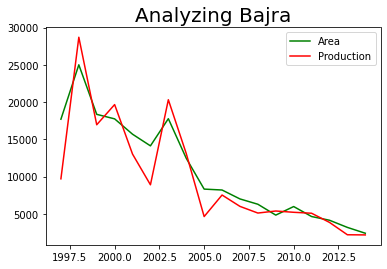

In [ ]:
import matplotlib.pyplot as plt
m=df16['Area']
n=df16['Production']
x=df16['Crop_Year']
plt.plot(x,m,label="Area",color='green',marker="")
plt.plot(x,n,label="Production",color='red',marker="")
# plt.xlim(0,20)
# plt.ylim(0,30000,5000)
# plt.axis([0,20,0,30000])
plt.title("Analyzing Bajra",fontsize=20)
plt.legend()
plt.savefig("Bajra Analysis.jpg")
plt.show()


In [ ]:
# Analysing of Maize
df17=df13[df13["Crop"] == 1]
df17

,Crop_Year,Crop,Area,Production,JUN,JUL,AUG,SEP,mansoon
1,1997,1,6400,6500,63.1,156.0,128.1,315.5,662.7
5,1998,1,6400,8600,136.2,214.1,252.2,255.5,858.0
9,1999,1,6419,9134,126.4,154.2,136.6,137.5,554.7
13,2000,1,6704,6979,200.5,154.1,311.5,102.9,768.9
17,2001,1,6879,7567,117.2,123.0,170.7,187.2,598.1
21,2002,1,6976,12843,115.2,74.7,173.5,71.7,435.0
25,2003,1,6910,12445,104.0,241.7,158.3,130.2,634.1
29,2004,1,6766,11773,152.8,192.1,125.0,101.7,571.5
33,2005,1,6834,12554,88.1,151.5,105.9,398.1,743.6
37,2006,1,7042,9253,132.0,126.8,279.7,224.1,762.6


In [ ]:
df18=df17.reset_index()
df18

,index,Crop_Year,Crop,Area,Production,JUN,JUL,AUG,SEP,mansoon
0,1,1997,1,6400,6500,63.1,156.0,128.1,315.5,662.7
1,5,1998,1,6400,8600,136.2,214.1,252.2,255.5,858.0
2,9,1999,1,6419,9134,126.4,154.2,136.6,137.5,554.7
3,13,2000,1,6704,6979,200.5,154.1,311.5,102.9,768.9
4,17,2001,1,6879,7567,117.2,123.0,170.7,187.2,598.1
5,21,2002,1,6976,12843,115.2,74.7,173.5,71.7,435.0
6,25,2003,1,6910,12445,104.0,241.7,158.3,130.2,634.1
7,29,2004,1,6766,11773,152.8,192.1,125.0,101.7,571.5
8,33,2005,1,6834,12554,88.1,151.5,105.9,398.1,743.6
9,37,2006,1,7042,9253,132.0,126.8,279.7,224.1,762.6


In [ ]:
df19=df18.drop(['index'],axis='columns')
df19

,Crop_Year,Crop,Area,Production,JUN,JUL,AUG,SEP,mansoon
0,1997,1,6400,6500,63.1,156.0,128.1,315.5,662.7
1,1998,1,6400,8600,136.2,214.1,252.2,255.5,858.0
2,1999,1,6419,9134,126.4,154.2,136.6,137.5,554.7
3,2000,1,6704,6979,200.5,154.1,311.5,102.9,768.9
4,2001,1,6879,7567,117.2,123.0,170.7,187.2,598.1
5,2002,1,6976,12843,115.2,74.7,173.5,71.7,435.0
6,2003,1,6910,12445,104.0,241.7,158.3,130.2,634.1
7,2004,1,6766,11773,152.8,192.1,125.0,101.7,571.5
8,2005,1,6834,12554,88.1,151.5,105.9,398.1,743.6
9,2006,1,7042,9253,132.0,126.8,279.7,224.1,762.6


In [ ]:
df19.to_csv("Predicting yield of maize in Visakhapatnam.csv")

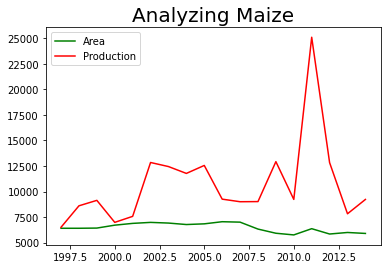

In [ ]:
import matplotlib.pyplot as plt
m=df19['Area']
n=df19['Production']
x=df19['Crop_Year']
plt.plot(x,m,label="Area",color='green',marker="")
plt.plot(x,n,label="Production",color='red',marker="")
# plt.xlim(0,20)
# plt.ylim(0,30000,5000)
# plt.axis([0,20,0,30000])
plt.title("Analyzing Maize",fontsize=20)
plt.legend()
plt.savefig("Maize Analysis.jpg")
plt.show()

In [ ]:
# Analysing of Ragi
df20=df13[df13["Crop"] == 2]
df20

,Crop_Year,Crop,Area,Production,JUN,JUL,AUG,SEP,mansoon
2,1997,2,35800,14600,63.1,156.0,128.1,315.5,662.7
6,1998,2,33300,31900,136.2,214.1,252.2,255.5,858.0
10,1999,2,33856,35041,126.4,154.2,136.6,137.5,554.7
14,2000,2,34119,32038,200.5,154.1,311.5,102.9,768.9
18,2001,2,32390,37151,117.2,123.0,170.7,187.2,598.1
22,2002,2,29769,25720,115.2,74.7,173.5,71.7,435.0
26,2003,2,32664,44129,104.0,241.7,158.3,130.2,634.1
30,2004,2,30886,28909,152.8,192.1,125.0,101.7,571.5
34,2005,2,28064,22928,88.1,151.5,105.9,398.1,743.6
38,2006,2,28746,24549,132.0,126.8,279.7,224.1,762.6


In [ ]:
df21=df20.reset_index()
df21

,index,Crop_Year,Crop,Area,Production,JUN,JUL,AUG,SEP,mansoon
0,2,1997,2,35800,14600,63.1,156.0,128.1,315.5,662.7
1,6,1998,2,33300,31900,136.2,214.1,252.2,255.5,858.0
2,10,1999,2,33856,35041,126.4,154.2,136.6,137.5,554.7
3,14,2000,2,34119,32038,200.5,154.1,311.5,102.9,768.9
4,18,2001,2,32390,37151,117.2,123.0,170.7,187.2,598.1
5,22,2002,2,29769,25720,115.2,74.7,173.5,71.7,435.0
6,26,2003,2,32664,44129,104.0,241.7,158.3,130.2,634.1
7,30,2004,2,30886,28909,152.8,192.1,125.0,101.7,571.5
8,34,2005,2,28064,22928,88.1,151.5,105.9,398.1,743.6
9,38,2006,2,28746,24549,132.0,126.8,279.7,224.1,762.6


In [ ]:
df22=df21.drop(['index'],axis='columns')
df22

,Crop_Year,Crop,Area,Production,JUN,JUL,AUG,SEP,mansoon
0,1997,2,35800,14600,63.1,156.0,128.1,315.5,662.7
1,1998,2,33300,31900,136.2,214.1,252.2,255.5,858.0
2,1999,2,33856,35041,126.4,154.2,136.6,137.5,554.7
3,2000,2,34119,32038,200.5,154.1,311.5,102.9,768.9
4,2001,2,32390,37151,117.2,123.0,170.7,187.2,598.1
5,2002,2,29769,25720,115.2,74.7,173.5,71.7,435.0
6,2003,2,32664,44129,104.0,241.7,158.3,130.2,634.1
7,2004,2,30886,28909,152.8,192.1,125.0,101.7,571.5
8,2005,2,28064,22928,88.1,151.5,105.9,398.1,743.6
9,2006,2,28746,24549,132.0,126.8,279.7,224.1,762.6


In [ ]:
df22.to_csv("Predicting yield of Ragi in Visakhapatnam.csv")

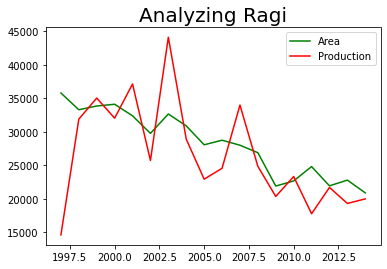

In [ ]:
import matplotlib.pyplot as plt
m=df22['Area']
n=df22['Production']
x=df22['Crop_Year']
plt.plot(x,m,label="Area",color='green',marker="")
plt.plot(x,n,label="Production",color='red',marker="")
# plt.xlim(0,20)
# plt.ylim(0,30000,5000)
# plt.axis([0,20,0,30000])
plt.title("Analyzing Ragi",fontsize=20)
plt.legend()
plt.savefig("Ragi Analysis.jpg")
plt.show()

In [ ]:
# Analysing of Rice
df23=df13[df13["Crop"] == 3]
df23

,Crop_Year,Crop,Area,Production,JUN,JUL,AUG,SEP,mansoon
3,1997,3,95600,79700,63.1,156.0,128.1,315.5,662.7
7,1998,3,114900,141300,136.2,214.1,252.2,255.5,858.0
11,1999,3,103372,134010,126.4,154.2,136.6,137.5,554.7
15,2000,3,115239,183345,200.5,154.1,311.5,102.9,768.9
19,2001,3,86579,145020,117.2,123.0,170.7,187.2,598.1
23,2002,3,61964,61344,115.2,74.7,173.5,71.7,435.0
27,2003,3,84676,136836,104.0,241.7,158.3,130.2,634.1
31,2004,3,95187,160771,152.8,192.1,125.0,101.7,571.5
35,2005,3,84808,125007,88.1,151.5,105.9,398.1,743.6
39,2006,3,93133,178070,132.0,126.8,279.7,224.1,762.6


In [ ]:
df24=df23.reset_index()
df24

,index,Crop_Year,Crop,Area,Production,JUN,JUL,AUG,SEP,mansoon
0,3,1997,3,95600,79700,63.1,156.0,128.1,315.5,662.7
1,7,1998,3,114900,141300,136.2,214.1,252.2,255.5,858.0
2,11,1999,3,103372,134010,126.4,154.2,136.6,137.5,554.7
3,15,2000,3,115239,183345,200.5,154.1,311.5,102.9,768.9
4,19,2001,3,86579,145020,117.2,123.0,170.7,187.2,598.1
5,23,2002,3,61964,61344,115.2,74.7,173.5,71.7,435.0
6,27,2003,3,84676,136836,104.0,241.7,158.3,130.2,634.1
7,31,2004,3,95187,160771,152.8,192.1,125.0,101.7,571.5
8,35,2005,3,84808,125007,88.1,151.5,105.9,398.1,743.6
9,39,2006,3,93133,178070,132.0,126.8,279.7,224.1,762.6


In [ ]:
df25=df24.drop(['index'],axis='columns')
df25

,Crop_Year,Crop,Area,Production,JUN,JUL,AUG,SEP,mansoon
0,1997,3,95600,79700,63.1,156.0,128.1,315.5,662.7
1,1998,3,114900,141300,136.2,214.1,252.2,255.5,858.0
2,1999,3,103372,134010,126.4,154.2,136.6,137.5,554.7
3,2000,3,115239,183345,200.5,154.1,311.5,102.9,768.9
4,2001,3,86579,145020,117.2,123.0,170.7,187.2,598.1
5,2002,3,61964,61344,115.2,74.7,173.5,71.7,435.0
6,2003,3,84676,136836,104.0,241.7,158.3,130.2,634.1
7,2004,3,95187,160771,152.8,192.1,125.0,101.7,571.5
8,2005,3,84808,125007,88.1,151.5,105.9,398.1,743.6
9,2006,3,93133,178070,132.0,126.8,279.7,224.1,762.6


In [ ]:
df25.to_csv("Predicting yield of Rice in Visakhapatnam.csv")

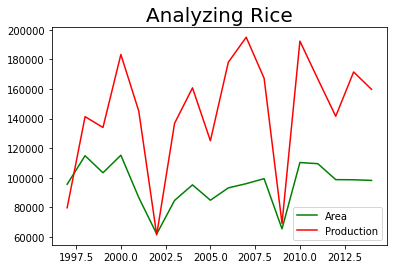

In [ ]:
import matplotlib.pyplot as plt
m=df25['Area']
n=df25['Production']
x=df25['Crop_Year']
plt.plot(x,m,label="Area",color='green',marker="")
plt.plot(x,n,label="Production",color='red',marker="")
# plt.xlim(0,20)
# plt.ylim(0,30000,5000)
# plt.axis([0,20,0,30000])
plt.title("Analyzing Rice",fontsize=20)
plt.legend()
plt.savefig("Rice Analysis.jpg")
plt.show()

In [ ]:
df26=df16.drop(['Crop_Year','Crop'],axis='columns')
df26

,Area,Production,JUN,JUL,AUG,SEP,mansoon
0,17700,9700,63.1,156.0,128.1,315.5,662.7
1,25000,28700,136.2,214.1,252.2,255.5,858.0
2,18351,16956,126.4,154.2,136.6,137.5,554.7
3,17746,19663,200.5,154.1,311.5,102.9,768.9
4,15686,13019,117.2,123.0,170.7,187.2,598.1
5,14123,8897,115.2,74.7,173.5,71.7,435.0
6,17771,20312,104.0,241.7,158.3,130.2,634.1
7,12458,13093,152.8,192.1,125.0,101.7,571.5
8,8319,4634,88.1,151.5,105.9,398.1,743.6
9,8197,7525,132.0,126.8,279.7,224.1,762.6


In [ ]:
# Features that are most important in determining yield of bajra in Visakhapatnam
R=df26.drop(['Production'],axis='columns')
s=df26[['Production']]
# from sklearn.model_selection import train_test_split
# R_train,R_test,s_train,s_test=train_test_split(R,s,test_size=0.3)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
ran=RandomForestRegressor(n_estimators=10)
ran.fit(R, s)
ran.score(R,s)
# preran=ran.predict(R)
print(ran.score(R,s))
# print(preran)


0.9556367036590072


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Feature: 0, Score: 0.82536
Feature: 1, Score: 0.00984
Feature: 2, Score: 0.04029
Feature: 3, Score: 0.00070
Feature: 4, Score: 0.08723
Feature: 5, Score: 0.03659


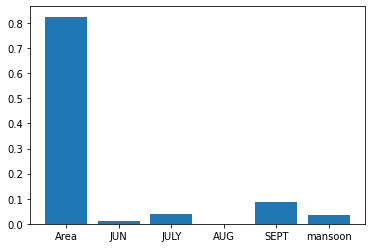

In [ ]:
# get importance

importance =ran.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
baj=["Area","JUN","JULY","AUG","SEPT","mansoon"]
# plot feature importance
plt.bar(baj, importance)
plt.show()

In [ ]:
df27=df19.drop(['Crop_Year','Crop'],axis='columns')
df27

,Area,Production,JUN,JUL,AUG,SEP,mansoon
0,6400,6500,63.1,156.0,128.1,315.5,662.7
1,6400,8600,136.2,214.1,252.2,255.5,858.0
2,6419,9134,126.4,154.2,136.6,137.5,554.7
3,6704,6979,200.5,154.1,311.5,102.9,768.9
4,6879,7567,117.2,123.0,170.7,187.2,598.1
5,6976,12843,115.2,74.7,173.5,71.7,435.0
6,6910,12445,104.0,241.7,158.3,130.2,634.1
7,6766,11773,152.8,192.1,125.0,101.7,571.5
8,6834,12554,88.1,151.5,105.9,398.1,743.6
9,7042,9253,132.0,126.8,279.7,224.1,762.6


In [ ]:
# Features that are most important in determining yield of Maize in Visakhapatnam
O=df27.drop(['Production'],axis='columns')
l=df27[['Production']]
from sklearn.model_selection import train_test_split
O_train,O_test,l_train,l_test=train_test_split(O,l,test_size=0.3)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
maize=RandomForestRegressor(n_estimators=10)
maize.fit(O_train, l_train)
maize.score(O_test,l_test)
maize.predict(O_test)
print(maize.score(O_test,l_test))

-1.5787917643681229


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Feature: 0, Score: 0.01772
Feature: 1, Score: 0.47542
Feature: 2, Score: 0.14436
Feature: 3, Score: 0.07799
Feature: 4, Score: 0.26552
Feature: 5, Score: 0.01899


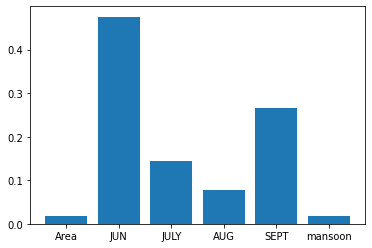

In [ ]:
importance =maize.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
maz=["Area","JUN","JULY","AUG","SEPT","mansoon"]
# plot feature importance
plt.bar(maz, importance)
plt.show()

In [ ]:
df36=df22.drop(['Crop_Year','Crop'],axis='columns')
df36

,Area,Production,JUN,JUL,AUG,SEP,mansoon
0,35800,14600,63.1,156.0,128.1,315.5,662.7
1,33300,31900,136.2,214.1,252.2,255.5,858.0
2,33856,35041,126.4,154.2,136.6,137.5,554.7
3,34119,32038,200.5,154.1,311.5,102.9,768.9
4,32390,37151,117.2,123.0,170.7,187.2,598.1
5,29769,25720,115.2,74.7,173.5,71.7,435.0
6,32664,44129,104.0,241.7,158.3,130.2,634.1
7,30886,28909,152.8,192.1,125.0,101.7,571.5
8,28064,22928,88.1,151.5,105.9,398.1,743.6
9,28746,24549,132.0,126.8,279.7,224.1,762.6


In [ ]:
# Features that are most important in determining yield of Ragi in Visakhapatnam
R=df36.drop(['Production'],axis='columns')
s=df36[['Production']]
from sklearn.model_selection import train_test_split
R_train,R_test,s_train,s_test=train_test_split(R,s,test_size=0.3)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
Ragi=RandomForestRegressor(n_estimators=10)
Ragi.fit(R_train, s_train)
Ragi.score(R_test,s_test)
Ragi.predict(R_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


array([36878.4, 38166.1, 39098.2, 21426.9, 25115.8, 21281.3])

Feature: 0, Score: 0.72908
Feature: 1, Score: 0.17660
Feature: 2, Score: 0.03270
Feature: 3, Score: 0.01475
Feature: 4, Score: 0.03804
Feature: 5, Score: 0.00885


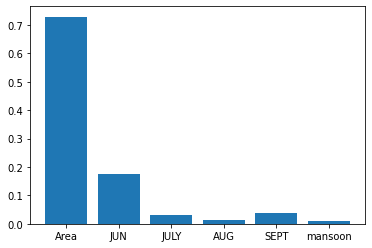

In [ ]:
importance =Ragi.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
rag=["Area","JUN","JULY","AUG","SEPT","mansoon"]
# plot feature importance
plt.bar(rag, importance)
plt.show()

In [ ]:
df37=df23.drop(['Crop_Year','Crop'],axis='columns')
df37

,Area,Production,JUN,JUL,AUG,SEP,mansoon
3,95600,79700,63.1,156.0,128.1,315.5,662.7
7,114900,141300,136.2,214.1,252.2,255.5,858.0
11,103372,134010,126.4,154.2,136.6,137.5,554.7
15,115239,183345,200.5,154.1,311.5,102.9,768.9
19,86579,145020,117.2,123.0,170.7,187.2,598.1
23,61964,61344,115.2,74.7,173.5,71.7,435.0
27,84676,136836,104.0,241.7,158.3,130.2,634.1
31,95187,160771,152.8,192.1,125.0,101.7,571.5
35,84808,125007,88.1,151.5,105.9,398.1,743.6
39,93133,178070,132.0,126.8,279.7,224.1,762.6


In [ ]:
# Features that are most important in determining yield of Rice in Visakhapatnam
E=df36.drop(['Production'],axis='columns')
f=df36[['Production']]
from sklearn.model_selection import train_test_split
E_train,E_test,f_train,f_test=train_test_split(E,f,test_size=0.3)

In [ ]:
#

from sklearn.ensemble import RandomForestRegressor
Rice=RandomForestRegressor(n_estimators=10)
Rice.fit(E_train, f_train)
Rice.score(E_test,f_test)
Rice.predict(E_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


array([35926.5, 25880.6, 31906.4, 25954.3, 23583.1, 29971.3])

In [ ]:
f_test

,Production
0,14600
16,19300
4,37151
11,24839
14,17761
8,22928


Feature: 0, Score: 0.61083
Feature: 1, Score: 0.12999
Feature: 2, Score: 0.08064
Feature: 3, Score: 0.14771
Feature: 4, Score: 0.02611
Feature: 5, Score: 0.00472


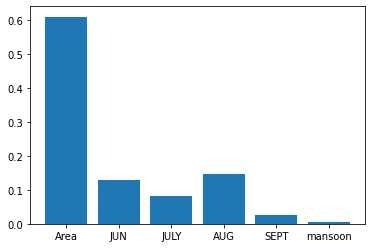

In [ ]:
importance =Rice.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
ric=["Area","JUN","JULY","AUG","SEPT","mansoon"]
# plot feature importance
plt.bar(ric, importance)
plt.show()

In [ ]:
df4

,YEAR,JUN,JUL,AUG,SEP,mansoon
0,1901,77.7,113.0,133.7,125.3,449.7
1,1902,72.6,144.5,236.1,204.5,657.7
2,1903,154.0,248.6,258.0,216.5,877.1
3,1904,107.8,120.2,117.7,116.8,462.6
4,1905,84.4,64.6,210.8,170.2,530.1
...,...,...,...,...,...,...
112,2013,127.5,162.4,123.1,132.0,545.0
113,2014,45.7,151.8,177.8,144.5,519.7
114,2015,283.8,116.0,192.0,201.8,793.6
115,2016,189.1,131.5,124.4,224.4,669.4


In [ ]:
df40=df4.drop(['JUN','JUL','AUG','SEP'],axis=1)
df40

,YEAR,mansoon
0,1901,449.7
1,1902,657.7
2,1903,877.1
3,1904,462.6
4,1905,530.1
...,...,...
112,2013,545.0
113,2014,519.7
114,2015,793.6
115,2016,669.4


In [ ]:
df40.to_csv("Mansoon LCA method.csv")

In [ ]:
df40.corr()

,YEAR,mansoon
YEAR,1.000000,0.146313
mansoon,0.146313,1.000000
